MODULE 1

['clear face', 'darkspots', 'puffy eyes', 'wrinkles'] = [163, 201, 201, 200]


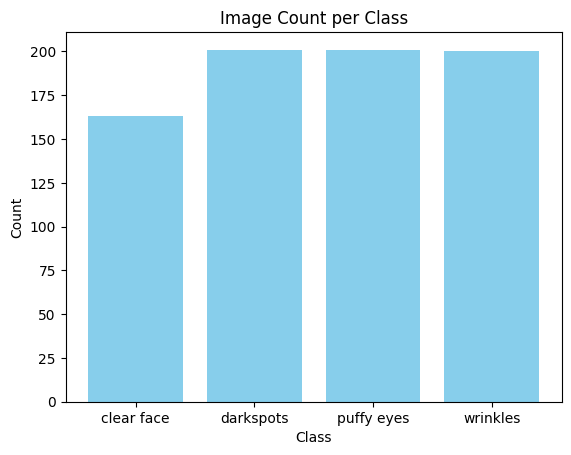

In [8]:
import os
import matplotlib.pyplot as plt

# Use absolute paths
BASE_DIR = r"c:/Users/shanm/Downloads/dataset"
class_folders = [
    os.path.join(BASE_DIR, 'clear face'),
    os.path.join(BASE_DIR, 'darkspots'),
    os.path.join(BASE_DIR, 'puffy eyes'),
    os.path.join(BASE_DIR, 'wrinkles')
]
class_names = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
exts = ['.jpeg', '.jpg', '.png', '.jpg_']
counts = []

for folder in class_folders:
    files = [f for f in os.listdir(folder) if os.path.splitext(f)[1].lower() in exts]
    counts.append(len(files))

print(f"{class_names} = {counts}")
plt.bar(class_names, counts, color='skyblue')
plt.title("Image Count per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

MODULE 2

Found 818 images belonging to 4 classes.
Found 349 images belonging to 4 classes.
Found 349 images belonging to 4 classes.


Found 818 images belonging to 4 classes.
Found 349 images belonging to 4 classes.
Found 349 images belonging to 4 classes.


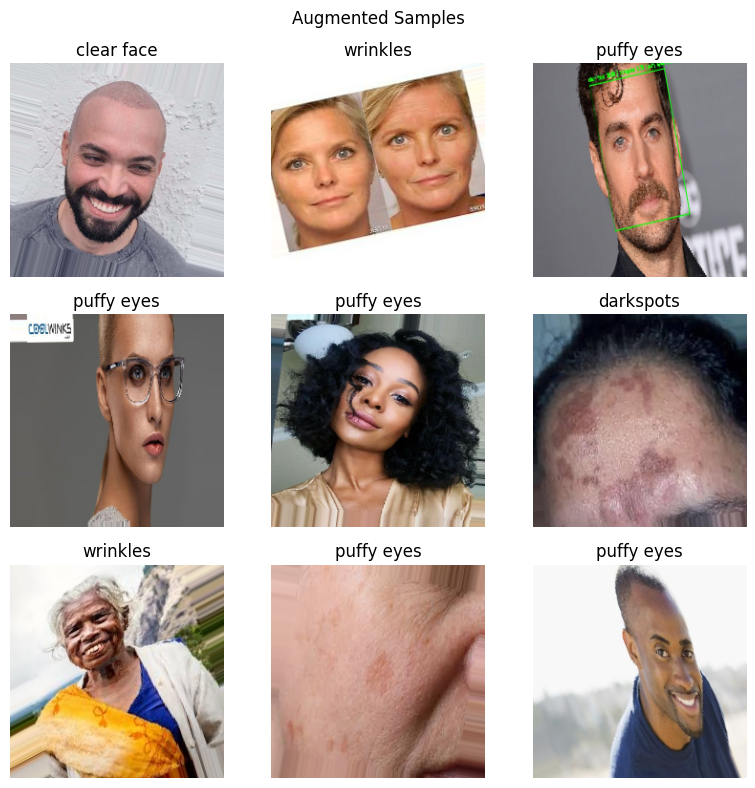

Found 818 images belonging to 4 classes.
Found 349 images belonging to 4 classes.
Found 349 images belonging to 4 classes.


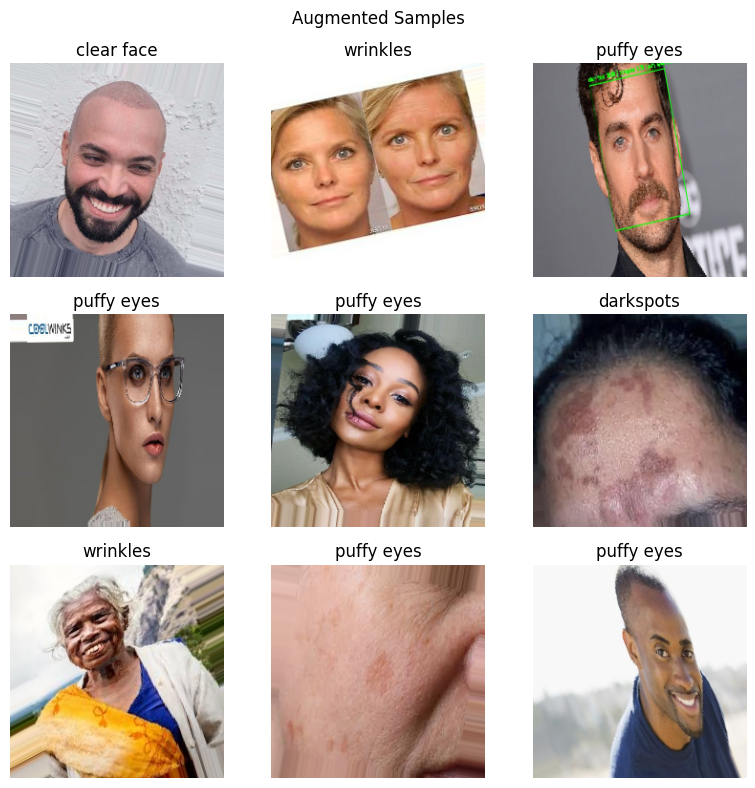

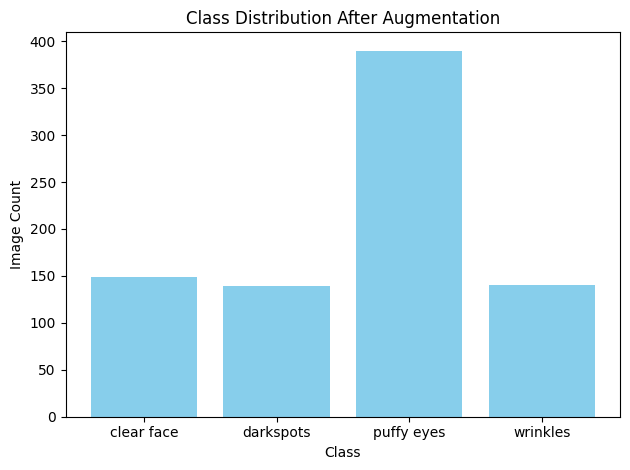

✅ Preprocessing and augmentation complete.
Total training images: 818
Validation images: 174
Test images: 175
One-hot encoded label shape: (818, 4)


In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants for dataset configuration
CLASS_NAMES = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
DATASET_DIR = "c:/Users/shanm/Downloads/dataset"  # Parent directory containing all class folders

# Preprocessing function is used to handle RGBA or palette images
def preprocess_image(img):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    return np.array(img)

# ImageDataGenerator is used for preprocessing and augmentation
def load_data_generators(dataset_dir, class_names, image_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        rotation_range=30,
        zoom_range=0.2,
        validation_split=0.3   # 70% for training, 30% for val+test
    )

    # Training generator
    train_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        classes=class_names,
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    # Temporary validation+testing generator
    valtest_generator = datagen.flow_from_directory(
        dataset_dir,
        target_size=image_size,
        batch_size=batch_size,
        classes=class_names,
        class_mode='categorical',
        shuffle=False,
        subset='validation'
    )

    # Split val+test data 50/50
    total_valtest = valtest_generator.samples
    half = total_valtest // 2

    valtest_images, valtest_labels = [], []
    for _ in range(total_valtest // batch_size + 1):
        imgs, lbls = next(valtest_generator)
        valtest_images.extend(imgs)
        valtest_labels.extend(lbls)
        if len(valtest_images) >= total_valtest:
            break

    valtest_images = np.array(valtest_images)[:total_valtest]
    valtest_labels = np.array(valtest_labels)[:total_valtest]

    val_images, test_images = np.split(valtest_images, [half])
    val_labels, test_labels = np.split(valtest_labels, [half])

    return train_generator, (val_images, val_labels), (test_images, test_labels)

# One-hot encoding will take place here
def collect_augmented_data(generator, batch_size):
    all_images = []
    all_labels = []

    for _ in range(generator.samples // batch_size + 1):
        imgs, lbls = next(generator)
        all_images.extend(imgs)
        all_labels.extend(lbls)
        if len(all_images) >= generator.samples:
            break

    all_images = np.array(all_images)[:generator.samples]
    all_labels = np.array(all_labels)[:generator.samples]

    return all_images, all_labels

# Visualize augmented samples
def visualize_augmented_samples(images, labels, class_names, num_samples=9):
    plt.figure(figsize=(8, 8))
    for i in range(num_samples):
        idx = np.random.randint(0, len(images))
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[idx])
        plt.title(class_names[np.argmax(labels[idx])])
        plt.axis('off')
    plt.suptitle("Augmented Samples")
    plt.tight_layout()
    plt.show()

# Class distribution after augmentation
def plot_class_distribution(labels, class_names):
    class_counts = np.sum(labels, axis=0)
    plt.bar(class_names, class_counts, color='skyblue')
    plt.title("Class Distribution After Augmentation")
    plt.xlabel("Class")
    plt.ylabel("Image Count")
    plt.tight_layout()
    plt.show()

def main():
    # Load train/val/test generators
    train_gen, (val_images, val_labels), (test_images, test_labels) = load_data_generators(
        DATASET_DIR, CLASS_NAMES, IMAGE_SIZE, BATCH_SIZE
    )

    # Collect augmented training data
    all_images, all_labels = collect_augmented_data(train_gen, BATCH_SIZE)

    # Visualize augmented samples
    visualize_augmented_samples(all_images, all_labels, CLASS_NAMES)

    # Plot class distribution
    plot_class_distribution(all_labels, CLASS_NAMES)

    # Print summary
    print("✅ Preprocessing and augmentation complete.")
    print(f"Total training images: {len(all_images)}")
    print(f"Validation images: {len(val_images)}")
    print(f"Test images: {len(test_images)}")
    print(f"One-hot encoded label shape: {all_labels.shape}")

if __name__ == "__main__":
    main()

MODULE 3

AI DERMAL CLASSIFICATION

Dataset Statistics:
Training samples: 282
Val+Test samples: 123
  clear face: 71 train, 31 val+test
  darkspots: 71 train, 31 val+test
  puffy eyes: 70 train, 31 val+test
  wrinkles: 70 train, 30 val+test

 Class weights: {0: np.float64(0.9929577464788732), 1: np.float64(0.9929577464788732), 2: np.float64(1.0071428571428571), 3: np.float64(1.0071428571428571)}

Plotting ACTUAL class distribution...

 Class weights: {0: np.float64(0.9929577464788732), 1: np.float64(0.9929577464788732), 2: np.float64(1.0071428571428571), 3: np.float64(1.0071428571428571)}

Plotting ACTUAL class distribution...


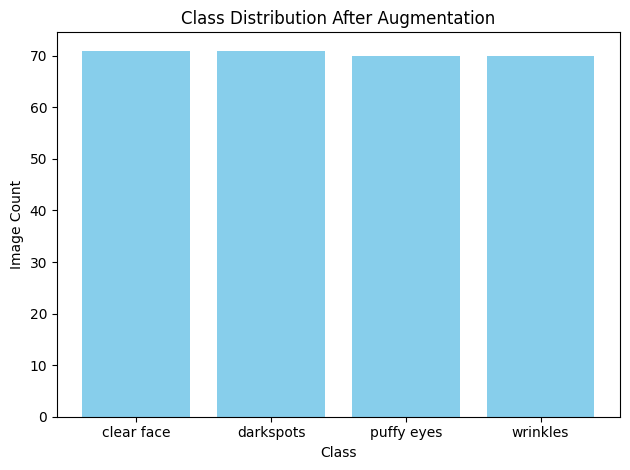



Visualizing augmented samples...

Visualizing augmented samples...


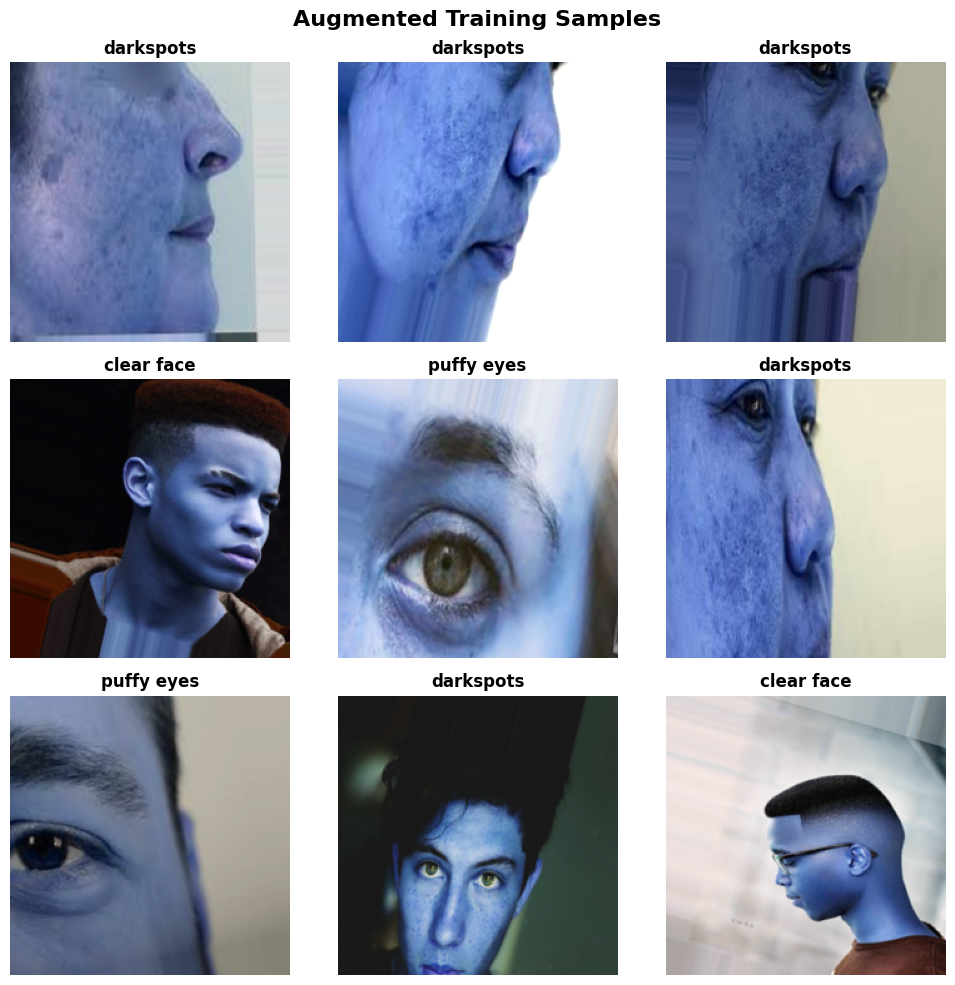


 Building ResNet50 model with input_shape: (224, 224, 3)
Model built with 24,780,420 total parameters
PHASE 1: Training with frozen ResNet50 base (20 epochs)
Model built with 24,780,420 total parameters
PHASE 1: Training with frozen ResNet50 base (20 epochs)


c:\Users\shanm\Downloads\dataset\clear face\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.4218 - loss: 2.6109
Epoch 1: val_accuracy improved from None to 0.59016, saving model to resnet50_dermal_model.h5

Epoch 1: val_accuracy improved from None to 0.59016, saving model to resnet50_dermal_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 669ms/step - accuracy: 0.5035 - loss: 2.4405 - val_accuracy: 0.5902 - val_loss: 2.5054 - learning_rate: 0.0010
Epoch 2/20
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6685 - loss: 2.0164
Epoch 2: val_accuracy improved from 0.59016 to 0.68852, saving model to resnet50_dermal_model.h5

Epoch 2: val_accuracy improved from 0.59016 to 0.68852, saving model to resnet50_dermal_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 510ms/step - accuracy: 0.7340 - loss: 1.9028 - val_accuracy: 0.6885 - val_loss: 2.1596 - learning_rate: 0.0010
Epoch 3/20
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.7863 - loss: 1.8526
Epoch 3: val_accuracy did not improve from 0.68852

Epoch 3: val_accuracy did not improve from 0.68852
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step - accuracy: 0.7482 - loss: 1.8792 - val_accuracy: 0.6721 - val_loss: 2.0473 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 543ms/step - accuracy: 0.7482 - loss: 1.8792 - val_accuracy: 0.6721 - val_loss: 2.0473 - learning_rate: 0.0010
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.8227 - loss: 1.7326
Epoch 4: val_accuracy improved from 0.68852 to 0.72131, saving model to resnet50_dermal_model.h5

Epoch 4: val_accuracy improved from 0.68852 to 0.72131, saving model to resnet50_dermal_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 609ms/step - accuracy: 0.7872 - loss: 1.7826 - val_accuracy: 0.7213 - val_loss: 1.9576 - learning_rate: 0.0010
Epoch 5/20
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.8107 - loss: 1.6847
Epoch 5: val_accuracy did not improve from 0.72131
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 586ms/step - accuracy: 0.8227 - loss: 1.6890 - val_accuracy: 0.7049 - val_loss: 2.0083 - learning_rate: 0.0010
Epoch 6/20

Epoch 5: val_accuracy did not improve from 0.72131
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 586ms/step - accuracy: 0.8227 - loss: 1.6890 - val_accuracy: 0.7049 - val_loss: 2.0083 - learning_rate: 0.0010
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.8146 - loss: 1.7270
Epoch 6: val_accuracy did not improve from 0.72131
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 542ms/step - accuracy: 0.8014 - loss: 1.7262 - val_accuracy: 0.7049 - val_loss: 2.0582 - learning_rate: 0.0010
Epoch 7/20

Epoch 6: val_accuracy did not improve from 0.72131
18/18 ━━━━━━━━━━━━━━━

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 550ms/step - accuracy: 0.8227 - loss: 1.6915 - val_accuracy: 0.7705 - val_loss: 1.9472 - learning_rate: 0.0010
Epoch 8/20
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step - accuracy: 0.8156 - loss: 1.6546
Epoch 8: val_accuracy did not improve from 0.77049

Epoch 8: val_accuracy did not improve from 0.77049
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 578ms/step - accuracy: 0.8440 - loss: 1.6134 - val_accuracy: 0.7705 - val_loss: 1.9460 - learning_rate: 0.0010
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 578ms/step - accuracy: 0.8440 - loss: 1.6134 - val_accuracy: 0.7705 - val_loss: 1.9460 - learning_rate: 0.0010
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.8477 - loss: 1.6288
Epoch 9: val_accuracy improved from 0.77049 to 0.80328, saving model to resnet50_dermal_model.h5

Epoch 9: val_accuracy improved from 0.77049 to 0.80328, saving model to resnet50_dermal_model.h5


18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 540ms/step - accuracy: 0.8191 - loss: 1.6659 - val_accuracy: 0.8033 - val_loss: 1.8907 - learning_rate: 0.0010
Epoch 10/20
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.8806 - loss: 1.5675
Epoch 10: val_accuracy did not improve from 0.80328
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 502ms/step - accuracy: 0.8723 - loss: 1.6020 - val_accuracy: 0.7705 - val_loss: 1.9419 - learning_rate: 0.0010
Epoch 11/20

Epoch 10: val_accuracy did not improve from 0.80328
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 502ms/step - accuracy: 0.8723 - loss: 1.6020 - val_accuracy: 0.7705 - val_loss: 1.9419 - learning_rate: 0.0010
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step - accuracy: 0.8717 - loss: 1.5455
Epoch 11: val_accuracy did not improve from 0.80328
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 567ms/step - accuracy: 0.8333 - loss: 1.6227 - val_accuracy: 0.7869 - val_loss: 1.9110 - learning_rate: 0.0010
Epoch 12/20

Epoch 11: val_accuracy did not improve from 0.80328
18/18 ━━━━━━━━

18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 568ms/step - accuracy: 0.8759 - loss: 1.5704 - val_accuracy: 0.8197 - val_loss: 1.8935 - learning_rate: 0.0010
Epoch 13/20
Epoch 13/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.8162 - loss: 1.6815
Epoch 13: val_accuracy did not improve from 0.81967

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.8511 - loss: 1.5847 - val_accuracy: 0.8197 - val_loss: 1.9198 - learning_rate: 0.0010
Epoch 14/20

Epoch 13: val_accuracy did not improve from 0.81967

Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 597ms/step - accuracy: 0.8511 - loss: 1.5847 - val_accuracy: 0.8197 - val_loss: 1.9198 - learning_rate: 0.0010
Epoch 14/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.8452 - loss: 1.5954
Epoch 14: val_accuracy did not improve from 0.81967
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 522ms/step - accuracy: 0.8511 - l


Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 571ms/step - accuracy: 0.9149 - loss: 1.4866 - val_accuracy: 0.8361 - val_loss: 1.9654 - learning_rate: 5.0000e-04
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 9.
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 571ms/step - accuracy: 0.9149 - loss: 1.4866 - val_accuracy: 0.8361 - val_loss: 1.9654 - learning_rate: 5.0000e-04
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 9.
PHASE 2: Fine-tuning (unfreezing last 40 layers)
Trainable parameters: 17,018,884
PHASE 2: Fine-tuning (unfreezing last 40 layers)
Trainable parameters: 17,018,884
Epoch 18/40
Epoch 18/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.8402 - loss: 1.6613
Epoch 18: val_accuracy did not improve from 0.83607

Epoch 18: val_accuracy did not improve from 0.83607
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 904ms/step - accuracy: 0.8404 - loss: 1.6512 - val_accuracy: 0.

FINAL EVALUATION

**Test Accuracy: 88.71%**
Test Loss: 1.5628

Per-Class Performance:

**Test Accuracy: 88.71%**
Test Loss: 1.5628

Per-Class Performance:
  clear face     : 80.00% (15 samples)
  darkspots      : 87.50% (16 samples)
  puffy eyes     : 93.75% (16 samples)
  wrinkles       : 93.33% (15 samples)

Training Summary:
  Best Validation Accuracy: 83.61%
  Final Training Accuracy: 92.91%
  Test Accuracy: 88.71%
  Val-Test Gap: 5.10%
  clear face     : 80.00% (15 samples)
  darkspots      : 87.50% (16 samples)
  puffy eyes     : 93.75% (16 samples)
  wrinkles       : 93.33% (15 samples)

Training Summary:
  Best Validation Accuracy: 83.61%
  Final Training Accuracy: 92.91%
  Test Accuracy: 88.71%
  Val-Test Gap: 5.10%
Training curves saved to 'training_curves.png'
Training curves saved to 'training_curves.png'


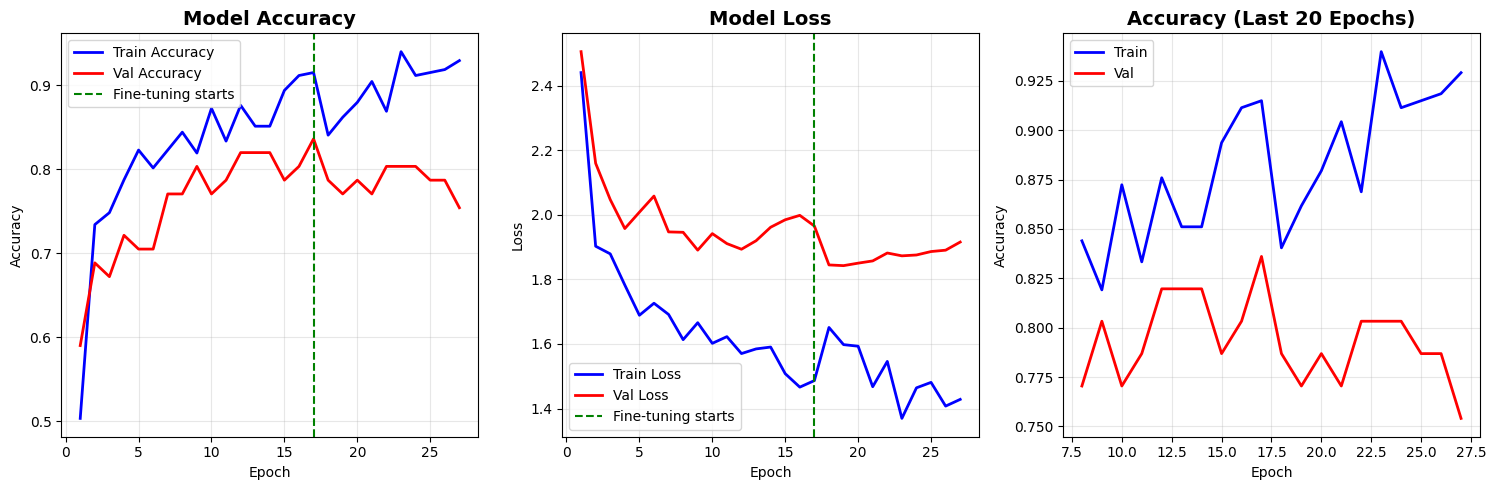

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from PIL import Image
import random

# Set seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


CLASS_NAMES = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']
IMAGE_SIZE = (224, 224) 
BATCH_SIZE = 16
DATASET_DIR = "c:/Users/shanm/Downloads/dataset"

# Preprocessing
def preprocess_image(img):
    if img.shape[-1] == 4:  
        img = img[..., :3]
    elif img.shape[-1] == 1:  
        img = np.repeat(img, 3, axis=-1)
    return preprocess_input(img)


# Data Generators
def load_data_generators(dataset_dir, class_names, image_size=(224, 224), batch_size=16):
    from PIL import Image
    import os

    def is_image_valid(filepath):
        try:
            img = Image.open(filepath)
            img.verify()
            return True
        except:
            return False

    # Collect valid image paths
    train_paths, train_labels = [], []
    valtest_paths, valtest_labels = [], []

    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_dir, class_name)
        if not os.path.exists(class_dir):
            continue
        images = [os.path.join(class_dir, f) for f in os.listdir(class_dir) 
                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.jpg_'))]
        valid_images = [img for img in images if is_image_valid(img)]
        np.random.shuffle(valid_images)
        split_idx = int(0.7 * len(valid_images))
        train_paths.extend(valid_images[:split_idx])
        train_labels.extend([i] * len(valid_images[:split_idx]))
        valtest_paths.extend(valid_images[split_idx:])
        valtest_labels.extend([i] * len(valid_images[split_idx:]))

    train_labels = np.array(train_labels)
    valtest_labels = np.array(valtest_labels)

    # Print statistics
    print("\nDataset Statistics:")
    print(f"Training samples: {len(train_paths)}")
    print(f"Val+Test samples: {len(valtest_paths)}")
    for i, class_name in enumerate(class_names):
        train_count = sum(1 for label in train_labels if label == i)
        valtest_count = sum(1 for label in valtest_labels if label == i)
        print(f"  {class_name}: {train_count} train, {valtest_count} val+test")

    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_image,
        horizontal_flip=True,
        rotation_range=25,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    train_gen = train_datagen.flow(
        x=np.array([np.array(Image.open(p).convert('RGB').resize(image_size)) for p in train_paths]),
        y=tf.keras.utils.to_categorical(train_labels, num_classes=len(class_names)),
        batch_size=batch_size,
        shuffle=True
    )

    # Stratified split for val/test
    valtest_images = np.array([np.array(Image.open(p).convert('RGB').resize(image_size)) for p in valtest_paths])
    
    val_images, test_images, val_labels, test_labels = train_test_split(
        valtest_images, valtest_labels, 
        test_size=0.5, 
        stratify=valtest_labels,
        random_state=42
    )

    # Preprocess
    val_images = np.array([preprocess_image(img) for img in val_images])
    val_labels = tf.keras.utils.to_categorical(val_labels, num_classes=len(class_names))
    test_images = np.array([preprocess_image(img) for img in test_images])
    test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=len(class_names))

    return train_gen, (val_images, val_labels), (test_images, test_labels), train_labels


# Collect augmented data from generator (for visualization only)
def collect_augmented_data(generator, batch_size, num_samples=None):

    all_images = []
    all_labels = []
    
    # Get the total number of samples from the generator
    if num_samples is None:
        num_samples = generator.n  # NumpyArrayIterator has 'n' attribute
    
    num_batches = (num_samples // batch_size) + 1
    
    for _ in range(num_batches):
        try:
            imgs, lbls = next(generator)
            all_images.extend(imgs)
            all_labels.extend(lbls)
            if len(all_images) >= num_samples:
                break
        except StopIteration:
            break

    all_images = np.array(all_images)[:num_samples]
    all_labels = np.array(all_labels)[:num_samples]

    return all_images, all_labels


# Visualize augmented samples
def visualize_augmented_samples(images, labels, class_names, num_samples=9):
    plt.figure(figsize=(10, 10))
    for i in range(min(num_samples, len(images))):
        idx = np.random.randint(0, len(images))
        plt.subplot(3, 3, i + 1)
        # Denormalize for visualization (ResNet preprocessing)
        img = images[idx].copy()
        img = img + [103.939, 116.779, 123.68]  # Reverse ResNet preprocessing
        img = np.clip(img, 0, 255).astype('uint8')
        plt.imshow(img)
        plt.title(class_names[np.argmax(labels[idx])], fontsize=12, fontweight='bold')
        plt.axis('off')
    plt.suptitle("Augmented Training Samples", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Class distribution after augmentation
def plot_class_distribution(labels, class_names):
    class_counts = np.bincount(labels, minlength=len(class_names))  
    plt.bar(class_names, class_counts, color='skyblue')
    plt.title("Class Distribution After Augmentation")
    plt.xlabel("Class")
    plt.ylabel("Image Count")
    plt.tight_layout()
    plt.show()
 


# Build ResNet50 Model 
def build_model(input_shape, num_classes):
    print(f"\n Building ResNet50 model with input_shape: {input_shape}")
    
    base_model = ResNet50(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False
    

    x = GlobalAveragePooling2D(name='avg_pool')(base_model.output)
    x = BatchNormalization()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.001), name='dense_1')(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(x)
    x = Dropout(0.4)(x)
    x = BatchNormalization()(x)
    output = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    print(f"Model built with {model.count_params():,} total parameters")
    return model, base_model


# Plot training curves
def plot_history(history1, history2):
    plt.figure(figsize=(15, 5))
    

    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    # Accuracy
    plt.subplot(1, 3, 1)
    plt.plot(epochs, acc, 'b-', label='Train Accuracy', linewidth=2)
    plt.plot(epochs, val_acc, 'r-', label='Val Accuracy', linewidth=2)
    plt.axvline(x=len(history1.history['accuracy']), color='g', linestyle='--', label='Fine-tuning starts')
    plt.title('Model Accuracy', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Loss
    plt.subplot(1, 3, 2)
    plt.plot(epochs, loss, 'b-', label='Train Loss', linewidth=2)
    plt.plot(epochs, val_loss, 'r-', label='Val Loss', linewidth=2)
    plt.axvline(x=len(history1.history['accuracy']), color='g', linestyle='--', label='Fine-tuning starts')
    plt.title('Model Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Accuracy (last 20 epochs)
    start_idx = max(0, len(epochs) - 20)
    plt.subplot(1, 3, 3)
    plt.plot(epochs[start_idx:], acc[start_idx:], 'b-', label='Train', linewidth=2)
    plt.plot(epochs[start_idx:], val_acc[start_idx:], 'r-', label='Val', linewidth=2)
    plt.title('Accuracy (Last 20 Epochs)', fontsize=14, fontweight='bold')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_curves.png', dpi=150, bbox_inches='tight')
    print("Training curves saved to 'training_curves.png'")
    try:
        plt.show()
    except:
        pass


def main():
    print("AI DERMAL CLASSIFICATION")
    # Load data
    train_gen, (val_images, val_labels), (test_images, test_labels), train_labels = load_data_generators(
        DATASET_DIR, CLASS_NAMES, IMAGE_SIZE, BATCH_SIZE)

    # Compute class weights from TRAINING data
    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(train_labels),
        y=train_labels
    )
    class_weights = dict(enumerate(class_weights))
    print(f"\n Class weights: {class_weights}")

    # Visualize ACTUAL class distribution (not augmented)
    print("\nPlotting ACTUAL class distribution...")
    plot_class_distribution(train_labels, CLASS_NAMES)

    # Optional: Visualize augmented samples
    print("\n Collecting augmented samples for visualization...")
    aug_images, aug_labels = collect_augmented_data(train_gen, BATCH_SIZE)
    
    print("\nVisualizing augmented samples...")
    visualize_augmented_samples(aug_images, aug_labels, CLASS_NAMES, num_samples=9)

    # Build model
    model, base_model = build_model(input_shape=(*IMAGE_SIZE, 3), num_classes=len(CLASS_NAMES))

    # Callbacks
    checkpoint = ModelCheckpoint(
        'resnet50_dermal_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1,
        mode='max'
    )
    
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=8,
        restore_best_weights=True,
        verbose=1
    )
    
    lr_reduce = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=4,
        min_lr=1e-7,
        verbose=1
    )

    # Phase 1: Train with frozen base
    print("PHASE 1: Training with frozen ResNet50 base (20 epochs)")
    print("="*70)
    
    history1 = model.fit(
        train_gen,
        validation_data=(val_images, val_labels),
        epochs=20,
        callbacks=[checkpoint, early_stop, lr_reduce],
        class_weight=class_weights,
        verbose=1
    )

    # Phase 2: Fine-tuning
    
    print("PHASE 2: Fine-tuning (unfreezing last 40 layers)")
    print("="*70)
    
    base_model.trainable = True
    

    for layer in base_model.layers[:-40]:
        layer.trainable = False
    
    # Count trainable parameters
    trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
    print(f"Trainable parameters: {trainable_params:,}")
    
    model.compile(
        optimizer=Adam(learning_rate=5e-5),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history2 = model.fit(
        train_gen,
        validation_data=(val_images, val_labels),
        epochs=40,
        initial_epoch=len(history1.history['loss']),
        callbacks=[checkpoint, early_stop, lr_reduce],
        class_weight=class_weights,
        verbose=1
    )

  
    best_model = load_model('resnet50_dermal_model.h5')
    print("FINAL EVALUATION")
    test_loss, test_acc = best_model.evaluate(test_images, test_labels, verbose=0)
    print(f"\n**Test Accuracy: {test_acc*100:.2f}%**")
    print(f"Test Loss: {test_loss:.4f}")
    
    # Per-class accuracy
    print("\nPer-Class Performance:")
    y_pred = best_model.predict(test_images, verbose=0)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(test_labels, axis=1)
    
    for i, class_name in enumerate(CLASS_NAMES):
        class_mask = y_true_classes == i
        if np.sum(class_mask) > 0:
            class_acc = np.mean(y_pred_classes[class_mask] == y_true_classes[class_mask])
            class_count = np.sum(class_mask)
            print(f"  {class_name:15s}: {class_acc*100:5.2f}% ({class_count} samples)")
    
    # Training summary
    best_val_acc = max(history1.history['val_accuracy'] + history2.history['val_accuracy'])
    final_train_acc = (history1.history['accuracy'] + history2.history['accuracy'])[-1]
    
    print(f"\nTraining Summary:")
    print(f"  Best Validation Accuracy: {best_val_acc*100:.2f}%")
    print(f"  Final Training Accuracy: {final_train_acc*100:.2f}%")
    print(f"  Test Accuracy: {test_acc*100:.2f}%")
    print(f"  Val-Test Gap: {abs(best_val_acc - test_acc)*100:.2f}%")
    

    
    # Plot training curves
    plot_history(history1, history2)

if __name__ == "__main__":
    main()


MODULE 4

Model loaded successfully
Model outputs: ListWrapper(['skin_condition', 'age'])
Detected 1 face(s)
Predicted Age: 23 years
Dominant Skin Condition: wrinkles (57.2%)


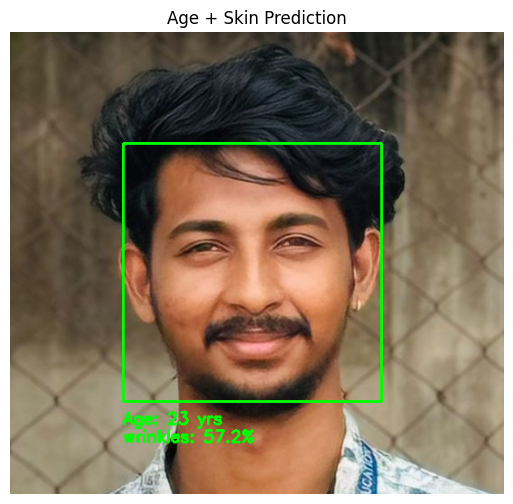

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

# Paths
FACE_CASCADE_PATH = cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
MODEL_PATH = r"C:\Users\shanm\Downloads\dataset\clear face\resnet50_multitask_dermal_age.h5"
TEST_IMAGE_PATH = r"C:\Users\shanm\Downloads\dataset\clear face\AI_DERMAL\facetest.jpg"

# Labels
CLASS_NAMES = ['clear face', 'darkspots', 'puffy eyes', 'wrinkles']

# Age calibration factors
AGE_CALIBRATION_A = 0.9
AGE_CALIBRATION_B = -2

# Load cascade
face_cascade = cv2.CascadeClassifier(FACE_CASCADE_PATH)

# Load model
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}")

model = load_model(MODEL_PATH)
print("Model loaded successfully")
print("Model outputs:", model.output_names)

# Preprocess face
def preprocess_face(face_img):
    face_resized = cv2.resize(face_img, (224, 224))
    img_array = np.expand_dims(face_resized, axis=0).astype('float32')
    return preprocess_input(img_array)

# Display helper
def display_image(img, title="Predicted Result"):
    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

# Main function
def detect_and_predict(image_path):
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return
    
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
    print(f"Detected {len(faces)} face(s)")

    if len(faces) == 0:
        print("⚠️ No faces found in image.")
        display_image(img)
        return

    for (x, y, w, h) in faces:
        face_crop = img[y:y+h, x:x+w]
        if face_crop.size == 0:
            continue

        try:
            preds = model.predict(preprocess_face(face_crop), verbose=0)

            # Multi-task model (skin + age)
            if isinstance(preds, list) and len(preds) == 2:
                skin_pred = preds[0][0]
                age_pred = preds[1][0][0]
                calibrated_age = int(round(AGE_CALIBRATION_A * age_pred + AGE_CALIBRATION_B))
            else:
                skin_pred = preds[0] if isinstance(preds, list) else preds[0]
                calibrated_age = None

            
            max_idx = np.argmax(skin_pred)
            top_condition = CLASS_NAMES[max_idx]
            top_conf = skin_pred[max_idx] * 100

            print(f"Predicted Age: {calibrated_age} years")
            print(f"Dominant Skin Condition: {top_condition} ({top_conf:.1f}%)")


           
            overlay_text = [
                f"Age: {calibrated_age} yrs",
                f"{top_condition}: {top_conf:.1f}%"
            ]

            for i, text in enumerate(overlay_text):
                cv2.putText(img, text, (x, y + h + 25 + i*20),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

        except Exception as e:
            print(f"Error during prediction: {e}")
            continue

    display_image(img, title="Age + Skin Prediction")


detect_and_predict(TEST_IMAGE_PATH)
